In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('score.csv')
cols = [f'trloss{i}' for i in range(4)]
df['tr_mean'] = df[cols].mean(axis=1)
df['tr_std'] = df[cols].std(axis=1)
cols = [f'loss{i}' for i in range(4)]
df['cv_mean'] = df[cols].mean(axis=1)
df['cv_std'] = df[cols].std(axis=1)
df_ = df.fillna('')
# df.drop(cols, axis=1, inplace=True)
df_ = df_.set_index(df_['model']+'::'+df_['impl_from']+'::'+df_['version'])
# df_ = df_.set_index(df['model']+' '+df['version'])
# df_
df.index = '──' + df_.index
df_

,model,impl_from,version,loss0,loss1,loss2,loss3,trloss0,trloss1,trloss2,trloss3,tr_mean,tr_std,cv_mean,cv_std
LB1stplace::::benchmark,LB1stplace,,benchmark,0.018180,0.01818,0.01818,0.01818,,,,,,,0.018180,0
mlp::::baseline,mlp,,baseline,0.024700,0.02522,0.02454,0.0243,,,,,,,0.024690,0.000389701
lgbm::::baseline,lgbm,,baseline,0.018077,0.018033,0.018248,0.018205,,,,,,,0.018141,0.000102151
lgbm::::pca feats only,lgbm,,pca feats only,0.018204,0.018229,0.018422,0.018384,,,,,,,0.018310,0.000109265
lgbm::pca feats only::diff,lgbm,pca feats only,diff,0.018174,0.018151,0.018439,0.018347,,,,,,,0.018278,0.000138596
lgbm::::pca feats,lgbm,,pca feats,0.017959,0.017932,0.018135,0.018111,,,,,,,0.018034,0.000103535
lgbm::pca feats::diff,lgbm,pca feats,diff,0.017958,,0.018139,,,,,,,,0.018049,0.000127986
lgbm::pca feats::selective features,lgbm,pca feats,selective features,0.017884,,0.01802,,,,,,,,0.017952,9.61665e-05
lgbm::::v1,lgbm,,v1,0.017272,0.017282,0.017357,0.017229,,,,,,,0.017285,5.32228e-05
lgbm::v1::platt scaling,lgbm,v1,platt scaling,0.017675,,,,,,,,,,0.017675,


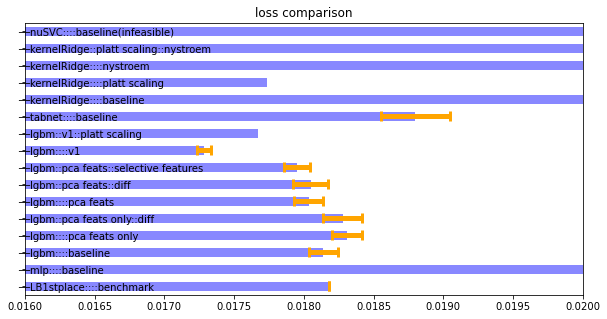

In [3]:
fig, ax = plt.subplots()
plt.sca(ax)
plt.yticks(ha='left')

p = df['cv_mean'].astype(np.float64).plot(kind='barh', xerr=df['cv_std'], 
                                       title='loss comparison', color='#88f', 
                                       error_kw={'ecolor': 'orange', 'elinewidth':5, 
                                                 'capsize':5, 'capthick': 3},
                                       figsize=(10,5), ax=ax)
p.set_xlim(.016, .020)
p.get_figure().savefig('score.png', bbox_inches='tight', dpi=400)

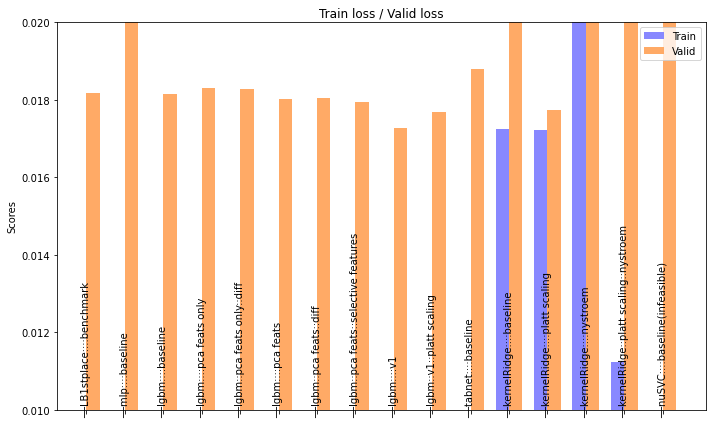

In [4]:
labels = df.index
train_loss = df['tr_mean']
valid_loss = df['cv_mean']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
plt.sca(ax)
plt.xticks(va='bottom',)

rects1 = ax.bar(x - width/2, train_loss, width, label='Train', color='#88f')
rects2 = ax.bar(x + width/2, valid_loss, width, label='Valid', color='#fa6')

ax.set_ylabel('Scores')
ax.set_title('Train loss / Valid loss')
ax.set_ylim(.010, .020)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
fig.tight_layout()
plt.savefig('score_tr_cv.png', bbox_inches='tight', dpi=400)